In [28]:
import  urllib
import geopandas
import pandas as pd
import numpy as np
import os
import requests
import json
import io
import csv
import shapely
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
df = pd.read_csv(os.getenv("PUIDATA") + "/World firearms murders and ownership - Sheet 1.csv")
df.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [30]:
shooting = pd.read_csv(os.getenv("PUIDATA") + "/data-pvLFI.csv")

In [31]:
shooting.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [32]:
GDP = pd.read_csv(os.getenv("PUIDATA") + "/af422289-c21e-4fb5-9ccd-05217ff620dc_Data.csv",usecols = ['Country Name','2012 [YR2012]'])
GDP.head()

,Country Name,2012 [YR2012]
0,Afghanistan,20536542736.7297
1,Albania,12319784787.2987
2,Algeria,209058991952.125
3,American Samoa,644000000
4,Andorra,3164615186.94591


In [33]:
merge_1 = GDP.merge(df, left_on="Country Name", right_on = "Country/Territory")
merge_1.head(1)

,Country Name,2012 [YR2012],Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,12319784787.2987,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0


In [34]:
pop = pd.read_csv(os.getenv("PUIDATA") + "/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv",usecols = ['Country Name', '2012'])
pop.head()

,Country Name,2012
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [35]:
merge_2 =  merge_1.merge(pop, left_on="Country Name", right_on = 'Country Name')
merge_2.head()

,Country Name,2012 [YR2012],Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,2012
0,Albania,12319784787.2987,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0,2900401.0
1,Algeria,209058991952.125,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0,37565847.0
2,Angola,113923162050.111,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0,25096150.0
3,Argentina,545982375701.128,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0,42096739.0
4,Armenia,10619320048.5857,Armenia,AM,CTS,13.0,9.0,0.29,52.0,12.5,380000.0,2881922.0


In [36]:
merge_3 = merge_2.merge(shooting,left_on='Country Name', right_on='Country')
merge_3.head()

,Country Name,2012 [YR2012],Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,2012,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,1543411012579.91,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,22742475.0,Australia,15.0,4
1,Austria,409425234155.263,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,8429991.0,Austria,30.4,1
2,Belgium,497884216568.867,Belgium,BE,WHO-MDB,39.5,70.0,0.68,34.0,17.2,1800000.0,11128246.0,Belgium,17.2,2
3,Canada,1824288757447.57,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,34750545.0,Canada,30.8,4
4,Denmark,327148899962.146,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,5591572.0,Denmark,12.0,0


In [38]:
df_ = merge_3.rename(index = str,columns={"2012 [YR2012]":'gdp', '2012':'pop','Number of mass shootings (1983-2013)':'Number of mass shootings'})
df_.head()

,Country Name,gdp,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,pop,Country,Guns per 100 inhabitants,Number of mass shootings
0,Australia,1543411012579.91,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,22742475.0,Australia,15.0,4
1,Austria,409425234155.263,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,8429991.0,Austria,30.4,1
2,Belgium,497884216568.867,Belgium,BE,WHO-MDB,39.5,70.0,0.68,34.0,17.2,1800000.0,11128246.0,Belgium,17.2,2
3,Canada,1824288757447.57,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,34750545.0,Canada,30.8,4
4,Denmark,327148899962.146,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,5591572.0,Denmark,12.0,0


In [41]:
df_.gdp = df_.gdp.astype(float)

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

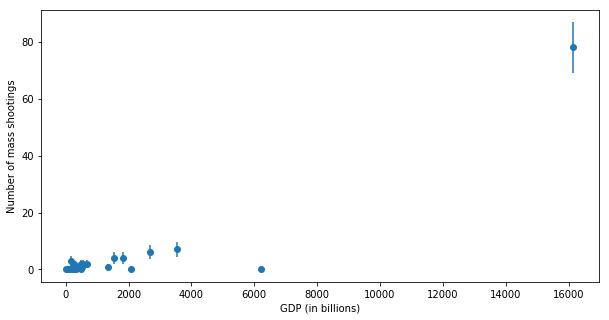

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [46]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
plt.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

In [44]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e3

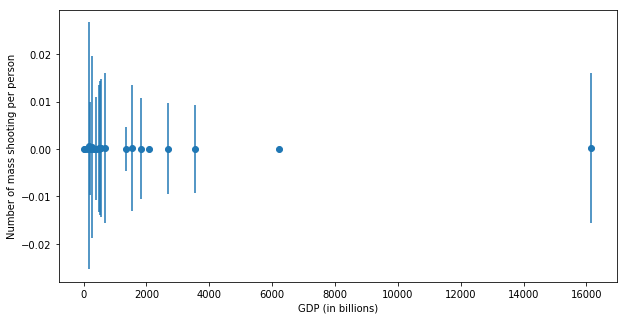

Number of mass shooting per person vs GDP, errors represent Poisson statistics.
The datapoint to the right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [49]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['shootingspp'])
ax.errorbar(df_.gdp / 1e9, df_['shootingspp'], 
            yerr = np.sqrt(df_['shootingspp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
plt.show()
print ("Number of mass shooting per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

## plot the average number of civilian fire arms per person

In [50]:
df_['civilian_fire_arms_pp'] = df_["Average total all civilian firearms"] / df_['pop'] * 1e3

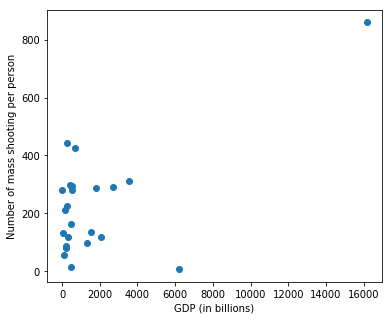

the average number of civilian fire arms per person vs GDP, The datapoint to the right of the plot is the USA, which has noth the highest GDP and the highest number of civilian fire arms per person


In [56]:
fig = plt.figure(figsize=(6,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['civilian_fire_arms_pp'])
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
plt.show()
print ("the average number of civilian fire arms per person vs GDP, " + 
       "The datapoint to the right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of civilian fire arms per person")

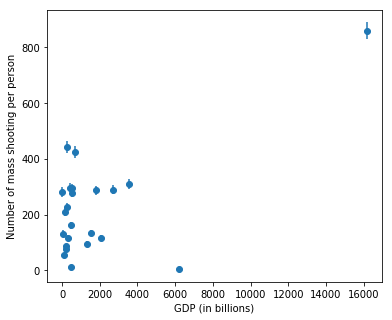

the average number of civilian fire arms per person vs GDP, errors represent Poisson statistics.
The datapoint to the right of the plot is the USA, which has noth the highest GDP and the highest number ofcivilian fire arms per person


In [57]:
fig = plt.figure(figsize=(6,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['civilian_fire_arms_pp'])
ax.errorbar(df_.gdp / 1e9, df_['civilian_fire_arms_pp'], 
            yerr = np.sqrt(df_['civilian_fire_arms_pp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
plt.show()
print ("the average number of civilian fire arms per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number ofcivilian fire arms per person")

## plot the average number of homicide by fire arms per person

Text(0.5,0,'homicides by firearm per 1000 people')

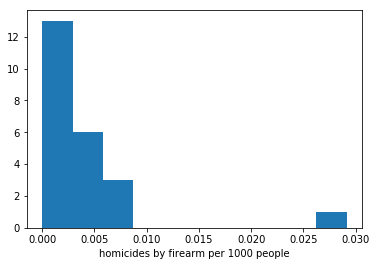

In [58]:
fig, ax = plt.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people')

Histogram of the average number of homicide by fire arms per person. There is an outlier to the right of the plot, which has the highest homicides by firearm per 1000 people

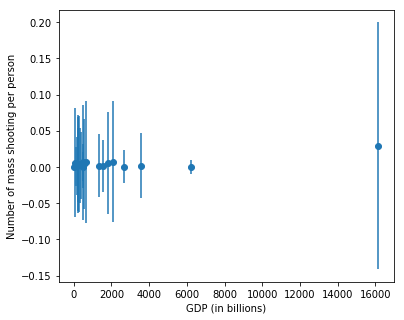

the average number of homicide by fire arms per person VS GDP, errors represent Poisson statistics.
The datapoint to the right of the plot is the USA, which has noth the highest GDP and the number of homicide by fire arms per person and the highest error


In [60]:
fig = plt.figure(figsize=(6,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.errorbar(df_.gdp / 1e9, df_['Number of homicides by firearm'] / df_['pop'] * 1000, 
            yerr = np.sqrt(df_['Number of homicides by firearm'] / df_['pop'] * 1000), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
plt.show()
print ("the average number of homicide by fire arms per person VS GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the right of the plot is the USA, " + 
       "which has noth the highest GDP and the number of homicide by fire arms per person and the highest ero")

## plot the number of homicides by fire arm against the number of civilian firearms. plot the US in a different color

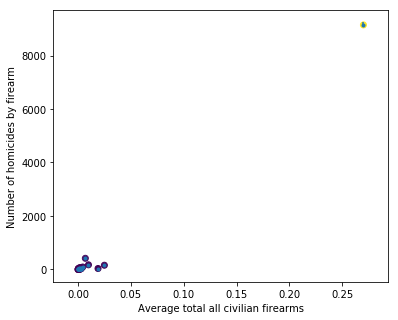

the number of homicides by fire arm against the number of civilian firearms. errors represent Poisson statistics and the error is blue
The datapoint to the right of the plot is the USA,it is in yelloe which has noth the highest GDP and the number of homicide by fire arms per person and the highest error


In [73]:
fig = plt.figure(figsize=(6,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'] / 1e9, df_['Number of homicides by firearm'],c = df_['Number of homicides by firearm'])
ax.errorbar(df_['Average total all civilian firearms'] / 1e9, df_['Number of homicides by firearm'], 
            yerr = np.sqrt(df_['Number of homicides by firearm']), fmt = '.')
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
plt.show()
print ("the number of homicides by fire arm against the number of civilian firearms. " + 
       "errors represent Poisson statistics and the error is blue\n" + 
       "The datapoint to the right of the plot is the USA,it is in yelloe " + 
       "which has noth the highest GDP and the number of homicide by fire arms per person and the highest error")

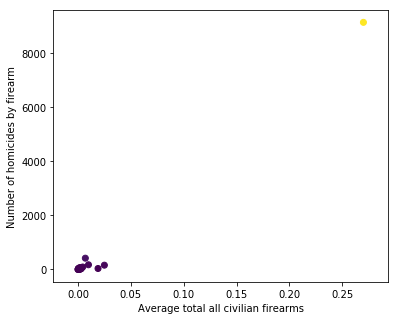

the number of homicides by fire arm against the number of civilian firearms. The datapoint to the right of the plot is the USA,it is in yellow which has noth the highest GDP and the number of homicide by fire arms per person and the highest error


In [71]:
fig = plt.figure(figsize=(6,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'] / 1e9, df_['Number of homicides by firearm'],c = df_['Number of homicides by firearm'])
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
plt.show()
print ("the number of homicides by fire arm against the number of civilian firearms. " + 
       "The datapoint to the right of the plot is the USA,it is in yellow " + 
       "which has noth the highest GDP and the number of homicide by fire arms per person and the highest error")

## plot the number of mass shootings against the number of civilian firearms. plot the US in a different color

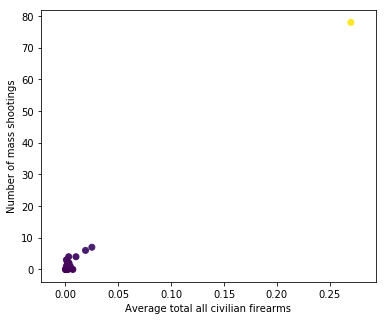

the Number of mass shootings against the number of civilian firearms. The datapoint to the right of the plot is the USA,it is in yellow which has noth the highest GDP and the number of homicide by fire arms per person and the highest error


In [75]:
fig = plt.figure(figsize=(6,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'] / 1e9, df_['Number of mass shootings'],c = df_['Number of mass shootings'])
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
plt.show()
print ("the Number of mass shootings against the number of civilian firearms. " + 
       "The datapoint to the right of the plot is the USA,it is in yellow " + 
       "which has noth the highest GDP and the number of homicide by fire arms per person and the highest error")

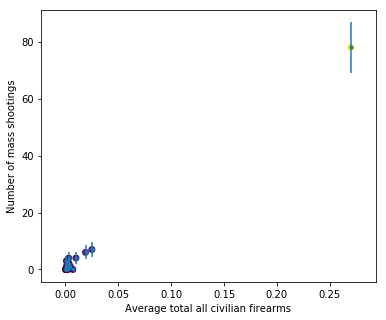

the Number of mass shootings against the number of civilian firearms. errors represent Poisson statistics and the error is blue
The datapoint to the right of the plot is the USA,it is in yelloe which has noth the highest GDP and the number of homicide by fire arms per person and the highest error


In [76]:
fig = plt.figure(figsize=(6,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'] / 1e9, df_['Number of mass shootings'],c = df_['Number of mass shootings'])
ax.errorbar(df_['Average total all civilian firearms'] / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings']), fmt = '.')
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
plt.show()
print ("the Number of mass shootings against the number of civilian firearms. " + 
       "errors represent Poisson statistics and the error is blue\n" + 
       "The datapoint to the right of the plot is the USA,it is in yelloe " + 
       "which has noth the highest GDP and the number of homicide by fire arms per person and the highest error")

## fit a line to the Number of mass shootings per person as a function of Average total all civilian firearms per person.

In [83]:
df_.shootingspp.mean()

0.00012356888832925391

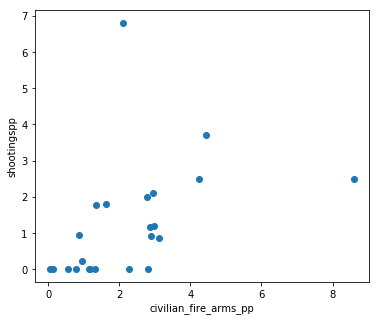

the Number of mass shootings against the number of civilian firearms. errors represent Poisson statistics and the error is blue
The datapoint to the right of the plot is the USA,it is in yelloe which has noth the highest GDP and the number of homicide by fire arms per person and the highest error


In [93]:
fig = plt.figure(figsize=(6,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['civilian_fire_arms_pp']/100, df_['shootingspp']/0.0001)
ax.set_xlabel("civilian_fire_arms_pp")
ax.set_ylabel("shootingspp")
ax.set_ylim()
plt.show()
print ("the Number of mass shootings against the number of civilian firearms. " + 
       "errors represent Poisson statistics and the error is blue\n" + 
       "The datapoint to the right of the plot is the USA,it is in yelloe " + 
       "which has noth the highest GDP and the number of homicide by fire arms per person and the highest error")

In [100]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [114]:
y = df_['shootingspp']/0.0001
x = df_['civilian_fire_arms_pp']/100

Text(0,0.5,'shootingspp')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


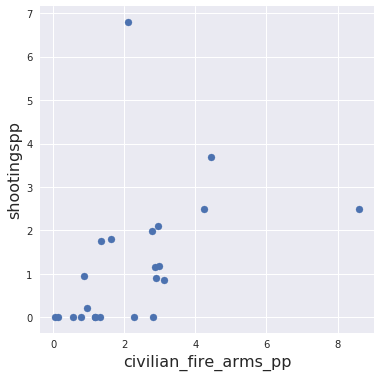

In [116]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x,y)
ax.set_xlabel('civilian_fire_arms_pp', fontsize=16)
ax.set_ylabel('shootingspp', fontsize=16)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


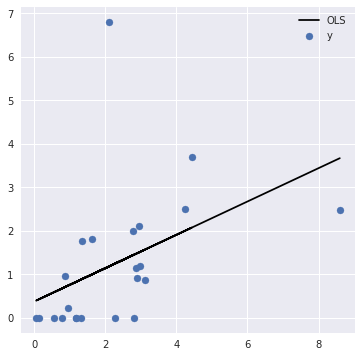

In [154]:
fig, ax = plt.subplots(figsize=(6,6))
evals = np.sqrt(y)
result_2 = smf.OLS(y,sm.add_constant(x)).fit().predict()
plt.scatter(x,y,label = 'y')
plt.legend()
plt.plot(x,result_2,color='black',label='OLS')
plt.legend()
plt.show()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


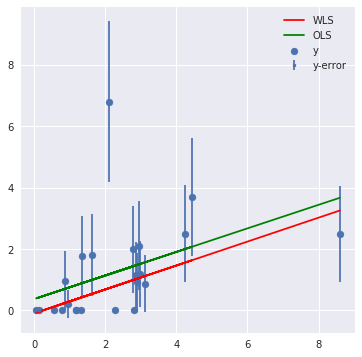

In [169]:
fig, ax = plt.subplots(figsize=(6,6))
evals = np.sqrt(y+1)
result = sm.WLS(y, sm.add_constant(x) ,1.0/evals**2).fit().predict()
result_2 = smf.OLS(y,sm.add_constant(x)).fit().predict()

plt.scatter(x,y, label = 'y')
plt.errorbar(x, y, yerr = np.sqrt(y), fmt = '.',label = 'y-error')
plt.plot(x,result,color='red',label = 'WLS')
plt.legend()
plt.plot(x,result_2,color='green',label='OLS')

plt.legend()
plt.show()

## Extra C:

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


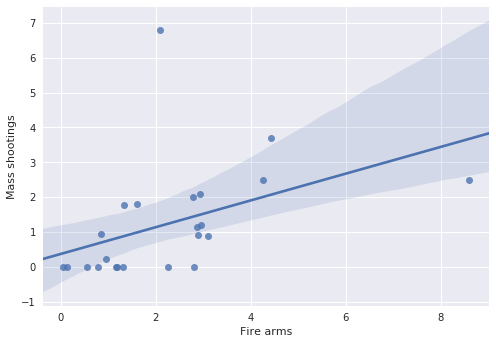

In [173]:
plt.figure()
import seaborn  as sns
sns.regplot(x=x, y=y);

plt.ylabel("Mass shootings")
plt.xlabel("Fire arms");